# Blockchain-based Secure Smart Grid Power Consumption Monitoring

Problem Statement:

Using the provided smart grid dataset (with features such as Temperature, Humidity, Wind Speed, Diffuse Flows, and Zone-wise Power Consumption), develop a blockchain-based monitoring system to securely record and analyze electricity consumption. The goal is to ensure data integrity, transparency, and trust in power consumption records across multiple zones of the smart grid


Importing Required Libraries

In [ ]:
import numpy as np              # numerical operations (optional, but lightweight)
import pandas as pd             # dataset handling
import matplotlib.pyplot as plt # basic visualization
import seaborn as sns           # advanced visualization
from datetime import datetime   # handling timestamps


**Dataset Overview**

Dataset Details -1
Dataset Name : Electric Power Consumption
Source : https://www.kaggle.com/datasets/fedesoriano/electric-power-consumption/data
File Format : .csv
Dataset Description

Tetouan_Energy_Consumption_Data
This dataset captures time-series electricity consumption data from Tetouan, a coastal city in northern Morocco. The data is sourced from Amendis, the regional utility operator, and reflects energy usage across low and medium voltage consumers. Each record corresponds to a specific timestamp and zone station—Quads, Smir, or Boussafou—within the city’s distribution network. The dataset is valuable for analyzing urban energy demand, evaluating distribution efficiency, and modeling consumption trends in a rapidly growing Mediterranean city.


Feature Description
Date Time: Time window of ten minutes.
Temperature: Weather Temperature.
Humidity: Weather Humidity.
Wind Speed: Wind Speed.
General Diffuse Flows: “Diffuse flow” is a catchall term to describe low-temperature (< 0.2° to ~ 100°C) fluids that slowly discharge through sulfide mounds, fractured lava flows, and assemblages of bacterial mats and macrofauna.
Diffuse Flows
Zone 1 Power Consumption
Zone 2 Power Consumption
Zone 3 Power Consumption

Importing Required **Libraries**

In [ ]:
import numpy as np               # For numerical operations
import pandas as pd              # For data manipulation and analysis
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns            # For advanced visualizations
from datetime import datetime    # For handling timestamps
from sklearn.model_selection import train_test_split     # For splitting data
from sklearn.linear_model import LinearRegression        # Basic regression model
from sklearn.ensemble import RandomForestRegressor       # More powerful ML model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # For evaluation
import joblib # For saving and Loading the Trained Model


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AIcte/powerconsumption.csv')

In [ ]:
df.head(5)

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AIcte/powerconsumption.csv")

In [ ]:
print(df.isnull().sum())

Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64


In [ ]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [ ]:
df['Hour'] = df['Datetime'].dt.hour
df['Day'] = df['Datetime'].dt.day
df['Month'] = df['Datetime'].dt.month

Datetime column is converted for time-based feature extraction (Hour, Day, Month).  
PowerConsumption_Zone1 is plotted over time to visualize daily consumption trends.

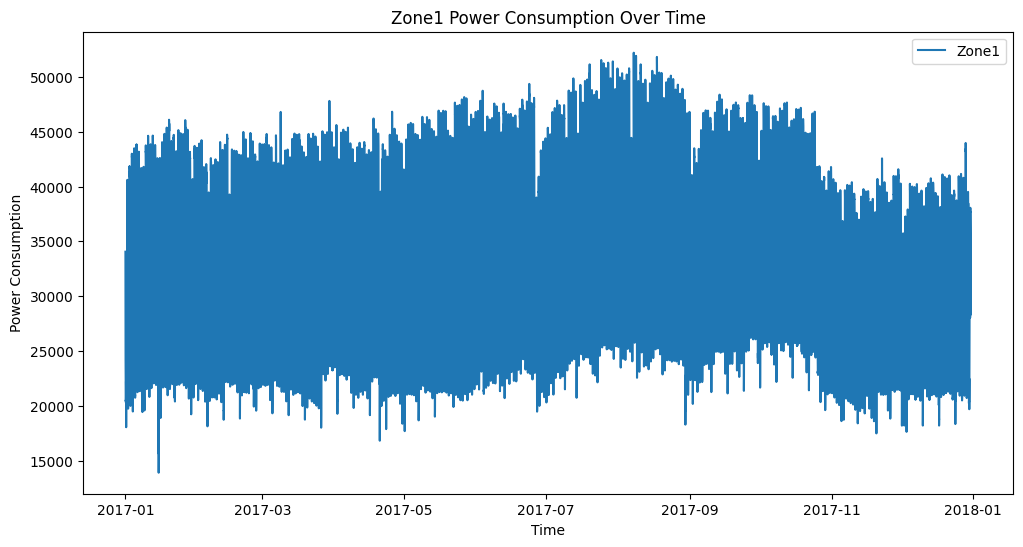

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Datetime'], df['PowerConsumption_Zone1'], label="Zone1")
plt.xlabel("Time")
plt.ylabel("Power Consumption")
plt.title("Zone1 Power Consumption Over Time")
plt.legend()
plt.show()

**Plotting Feature Distrbutions**

Correlation heatmaps help visualize how features relate to each other, making it easier to spot strong associations. They’re useful for selecting key variables, detecting overlap, and summarizing patterns in the dataset efficiently.

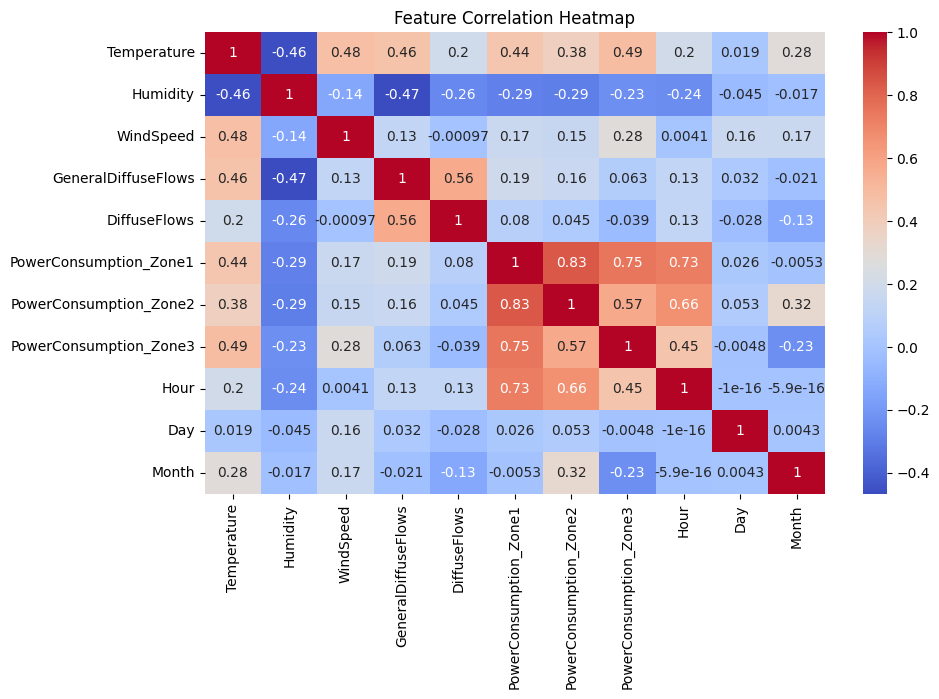

In [ ]:
# Drop Datetime to check correlation
corr = df.drop(columns=['Datetime']).corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


**Plotting Feature Distrbutions**

Feature distributions provide insight into how each variable is spread across its range.  
This plot focuses on daytime data to reveal meaningful variation by excluding zero values.

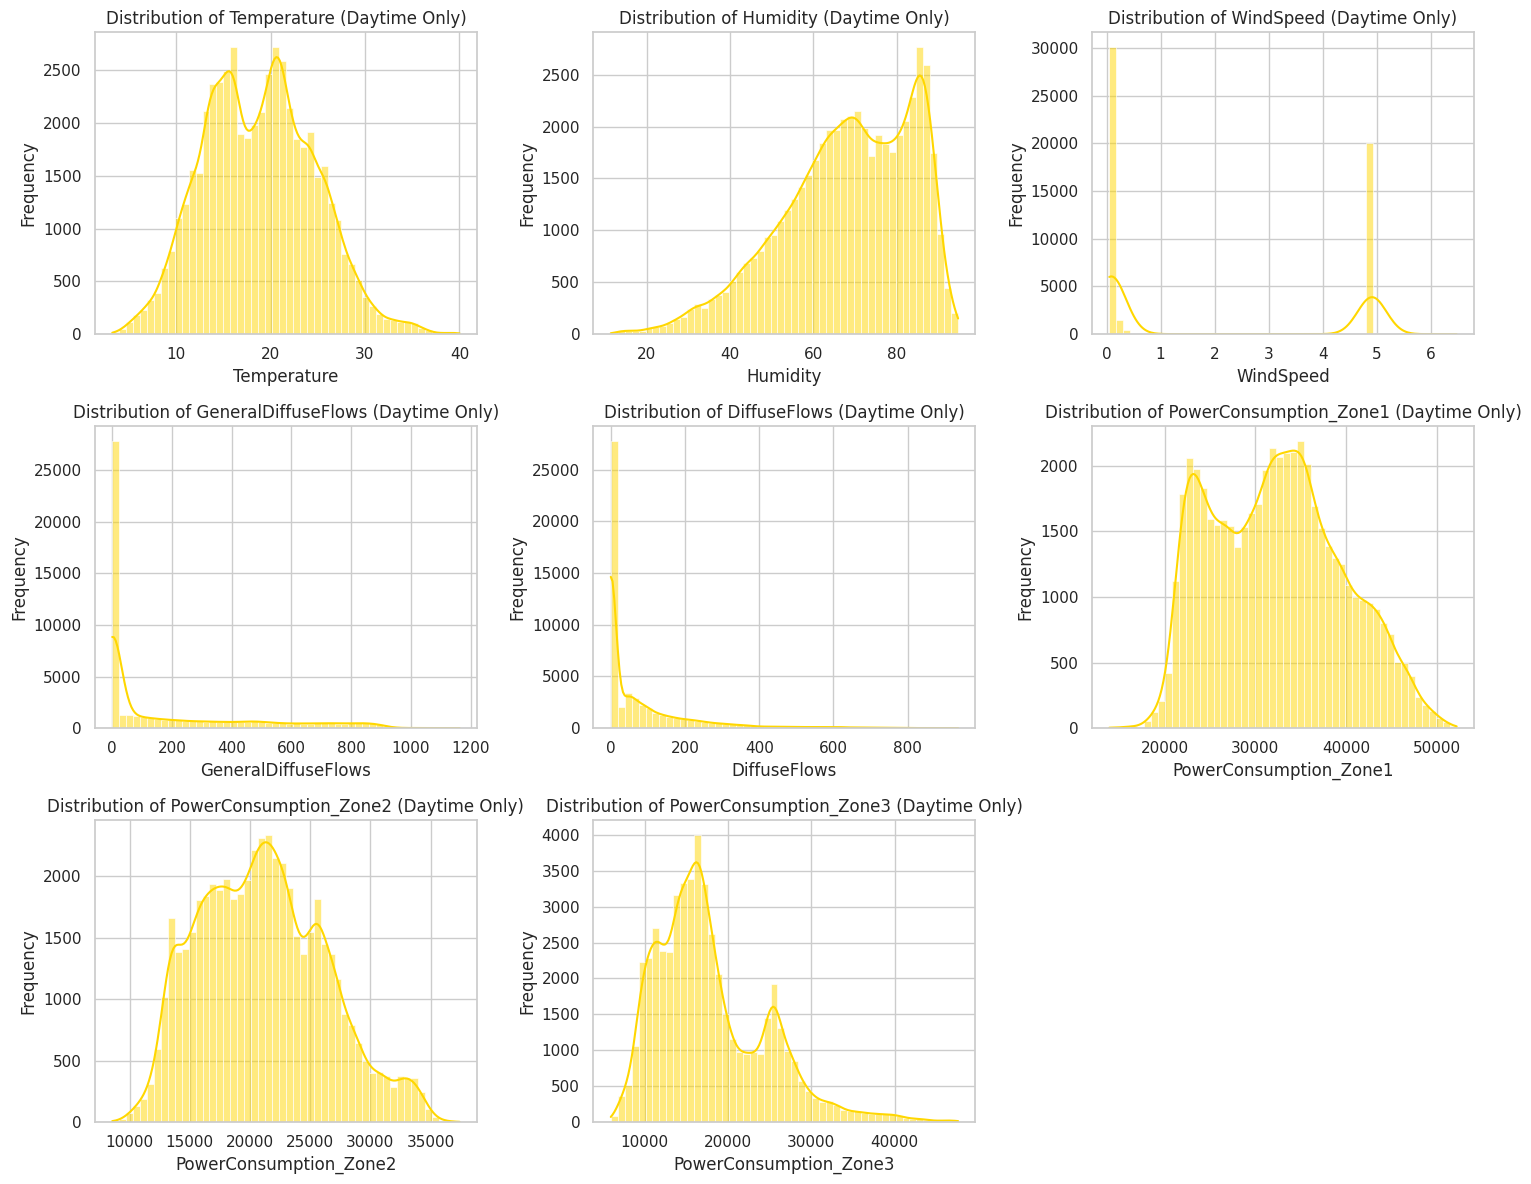

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset

df = pd.read_csv('/content/drive/MyDrive/AIcte/powerconsumption.csv')
# Filter daytime data using DiffuseFlows > 0 (assuming this represents irradiation)
daytime_data = df[df['DiffuseFlows'] > 0]

# Select numeric columns (excluding datetime if it's parsed as object/string)
numeric_columns = daytime_data.select_dtypes(include=['float64', 'int64']).columns

# Plotting distributions
sns.set(style="whitegrid")
plt.figure(figsize=(15, 12))

for i, col in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(daytime_data[col], kde=True, bins=50, color='gold')
    plt.title(f'Distribution of {col} (Daytime Only)')
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()



- **Temperature**: Bimodal distribution suggests two distinct temperature ranges, possibly due to seasonal or diurnal variation.
- **Humidity**: Slightly left-skewed, indicating consistently high humidity levels.
- **WindSpeed**: Sharp peak at low values, showing minimal wind activity during most daytime hours.
- **GeneralDiffuseFlows & DiffuseFlows**: Strong right skew—low radiation values dominate, likely due to cloudy or low-light conditions.
- **PowerConsumption_Zone1**: Right-skewed, with most readings at lower consumption levels and few high-demand instances.
- **PowerConsumption_Zone2**: Similar right-skewed pattern, though slightly broader spread than Zone1.
- **PowerConsumption_Zone3**: Bimodal distribution, indicating two distinct usage patterns—possibly different operational modes or user behaviors.



Handling Outliers

Outliers are data points that significantly deviate from other observations in a dataset. They can arise due to measurement errors, data entry mistakes, or genuinely represent extreme values. Here we are going to use the Box Plot for visualizing the outliers.

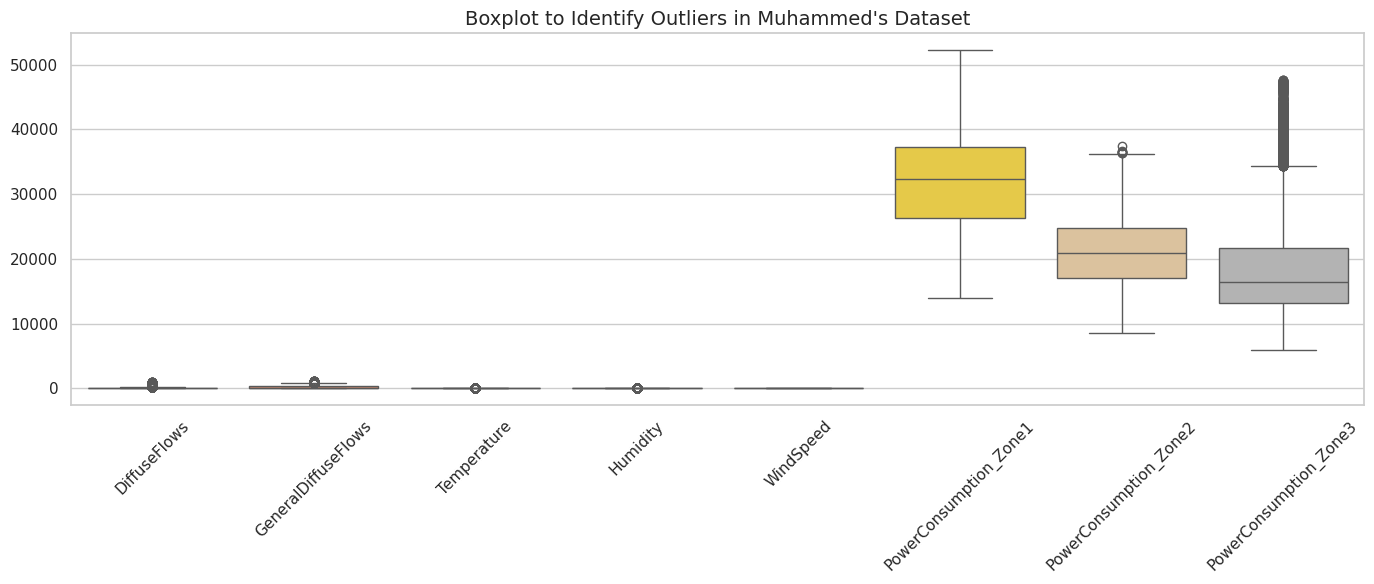

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features from your dataset to check for outliers
features = [
    'DiffuseFlows',
    'GeneralDiffuseFlows',
    'Temperature',
    'Humidity',
    'WindSpeed',
    'PowerConsumption_Zone1',
    'PowerConsumption_Zone2',
    'PowerConsumption_Zone3'
]

# Plotting boxplots
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[features], palette="Set2")
plt.title("Boxplot to Identify Outliers in Muhammed's Dataset", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Linear Regression and Random Forest models are trained to predict Zone1 power consumption using weather-related features.  
Model performance is evaluated using MAE, MSE, and R² to compare accuracy and error levels.

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features and target
features = [
    'DiffuseFlows',
    'GeneralDiffuseFlows',
    'Temperature',
    'Humidity',
    'WindSpeed'
]
target = 'PowerConsumption_Zone1'  # You can change this to Zone2 or Zone3 if needed

# Split data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1️⃣ Linear Regression (Baseline)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# 2️⃣ Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# 📊 Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.2f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.2f}")

# Evaluate both models
evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Random Forest", y_test, rf_preds)


Linear Regression Performance:
MAE: 5185.74
MSE: 39842406.22
R² Score: 0.21

Random Forest Performance:
MAE: 3213.28
MSE: 21517099.87
R² Score: 0.57




This plot compares actual and predicted power consumption for Zone1 using Random Forest.  
MAE and R² metrics are displayed to assess prediction accuracy visually.

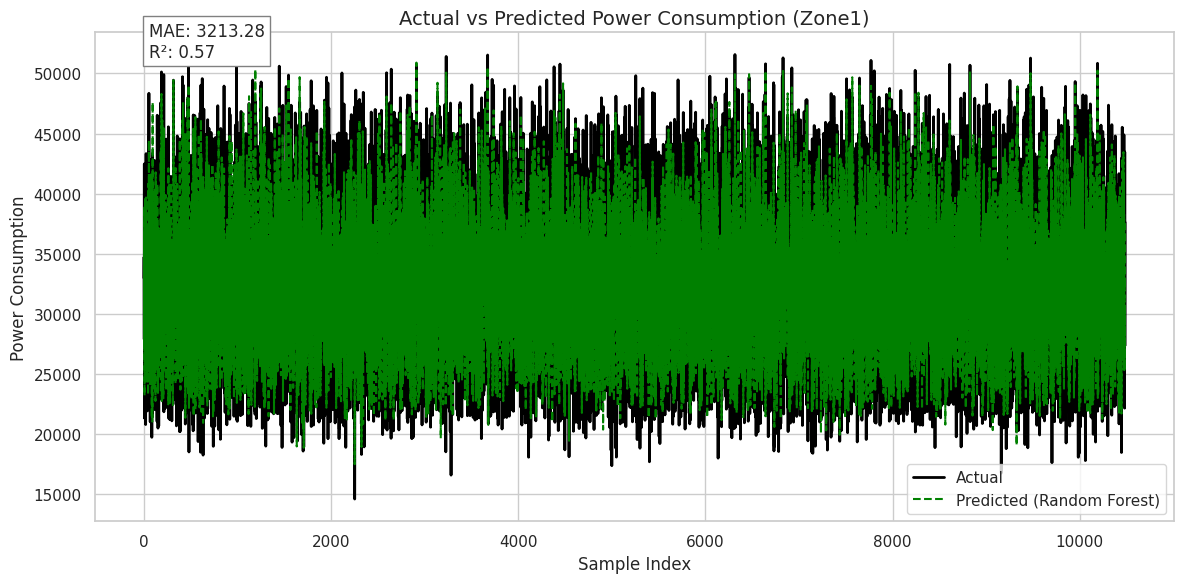

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

# Evaluate errors
mae_rf = mean_absolute_error(y_test, rf_preds)
r2_rf = r2_score(y_test, rf_preds)

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='black', linewidth=2)
plt.plot(rf_preds, label='Predicted (Random Forest)', color='green', linestyle='--')
plt.title('Actual vs Predicted Power Consumption (Zone1)', fontsize=14)
plt.xlabel('Sample Index')
plt.ylabel('Power Consumption')
plt.legend()

# Show error metrics on plot
plt.text(0.05, 0.95, f'MAE: {mae_rf:.2f}\nR²: {r2_rf:.2f}', transform=plt.gca().transAxes,
         fontsize=12, bbox=dict(facecolor='white', edgecolor='gray'))

plt.tight_layout()
plt.show()



Power consumption predictions are securely stored in a custom blockchain using SHA-256 hashing.  
Tampering is detected by validating hash integrity across the chain.

In [11]:
import hashlib
import datetime

# Define a simple Block class
class Block:
    def __init__(self, index, timestamp, data, previous_hash):
        self.index = index
        self.timestamp = timestamp
        self.data = data  # e.g., predicted power consumption
        self.previous_hash = previous_hash
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        block_string = f"{self.index}{self.timestamp}{self.data}{self.previous_hash}"
        return hashlib.sha256(block_string.encode()).hexdigest()

# Create the blockchain
class Blockchain:
    def __init__(self):
        self.chain = [self.create_genesis_block()]

    def create_genesis_block(self):
        return Block(0, str(datetime.datetime.now()), "Genesis Block", "0")

    def add_block(self, data):
        last_block = self.chain[-1]
        new_block = Block(len(self.chain), str(datetime.datetime.now()), data, last_block.hash)
        self.chain.append(new_block)

    def is_chain_valid(self):
        for i in range(1, len(self.chain)):
            curr = self.chain[i]
            prev = self.chain[i - 1]

            if curr.hash != curr.calculate_hash():
                print(f"❌ Block {i} has been tampered!")
                return False
            if curr.previous_hash != prev.hash:
                print(f"❌ Block {i} has incorrect previous hash!")
                return False
        print("✅ Blockchain is valid.")
        return True

# Simulate predictions and store in blockchain
predictions = [120.5, 130.2, 125.0, 140.8]  # Example PowerConsumption predictions

bc = Blockchain()
for pred in predictions:
    bc.add_block(f"Predicted PowerConsumption_Zone1: {pred}")

# Check blockchain integrity
bc.is_chain_valid()

# Optional: Tamper with a block to test detection
bc.chain[2].data = "Tampered Data"
bc.is_chain_valid()

✅ Blockchain is valid.
❌ Block 2 has been tampered!


False


Predicted power consumption values are securely stored in a mined blockchain using proof-of-work.  
Each block includes a nonce and timestamp, ensuring tamper detection and traceable logging.

In [19]:
import hashlib
import datetime
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# 1️⃣ ML Prediction (PowerConsumption_Zone1)
features = ['DiffuseFlows', 'GeneralDiffuseFlows', 'Temperature', 'Humidity', 'WindSpeed']
target = 'PowerConsumption_Zone1'

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# 2️⃣ Blockchain Setup
class Block:
    def __init__(self, index, timestamp, data, previous_hash):
        self.index = index
        self.timestamp = timestamp
        self.data = data
        self.previous_hash = previous_hash
        self.nonce = 0  # Add nonce here
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        block_string = f"{self.index}{self.timestamp}{self.data}{self.previous_hash}{self.nonce}" # Include nonce in hash calculation
        return hashlib.sha256(block_string.encode()).hexdigest()

    # Create a "mine_block" method
    def mine_block(self, difficulty):
        # The target is a string of zeros
        target = '0' * difficulty

        # Loop until the hash starts with the target string of zeros
        while self.hash[:difficulty] != target:
            self.nonce += 1
            self.hash = self.calculate_hash() # Recalculate hash with the new nonce

        print(f"Block Mined! Hash: {self.hash}")


class Blockchain:
    def __init__(self):
        self.chain = [self.create_genesis_block()]

    def create_genesis_block(self):
        return Block(0, str(datetime.datetime.now()), "Genesis Block", "0")

    def add_block(self, data):
        last_block = self.chain[-1]
        new_block = Block(len(self.chain), str(datetime.datetime.now()), data, last_block.hash)
        self.chain.append(new_block)

    def display_chain(self):
        for block in self.chain:
            print(f"🔹 Block {block.index}")
            print(f"   Timestamp: {block.timestamp}")
            print(f"   Data: {block.data}")
            print(f"   Hash: {block.hash}")
            print(f"   Prev Hash: {block.previous_hash}")
            print(f"   Nonce: {block.nonce}\n") # Display nonce as well

# 3️⃣ Store Predictions in Blockchain
bc = Blockchain()
# mine the genesis block
bc.chain[0].mine_block(2) # mine genesis block with difficulty 2

for i, pred in enumerate(predictions[:10]):  # Limit to first 10 for brevity
    bc.add_block(f"Predicted PowerConsumption_Zone1: {pred:.2f}")
    bc.chain[-1].mine_block(2) # mine each new block with difficulty 2


# 4️⃣ Display Blockchain
bc.display_chain()

Block Mined! Hash: 000320ad42737514a7a7764a2b4e27754bde60d8934fb0a6ac806829d31fc922
Block Mined! Hash: 00219c80fd7d30a03badb1fed425c6947885b83c11cd6b4a63ad42e66452301b
Block Mined! Hash: 006f65500bdc2dca6ed940c7a6ec2c9e3e751276e0c67e276d66623ed130f22d
Block Mined! Hash: 00053af96f1951aa198cf2cc02fffd1efab7282f8d37bb21896538d99d352a1f
Block Mined! Hash: 007ee831ff2a153982de5ab62b666c015ef786784161e0bc69d6309363ffd4e9
Block Mined! Hash: 00e2209c7f1b2c1b5d2fcc5957aac4406cbdaf9e5652e52418ccf8975ed6e514
Block Mined! Hash: 006c640d4933f7d1ef77cf13883ca80a7cf62c57b6f19b4d7da72134a8be012d
Block Mined! Hash: 00b7a71f713531335e93c0ab830757acaea73981fc3e8287d0464580dd74aaa7
Block Mined! Hash: 004f65bd6cea6deb357ff65b834691ce5eb12d4137874ec28188f10d8456a4b0
Block Mined! Hash: 00ff9cb173f970085a974d0c96c901932e59c0e5bbc09d09fab807f4afeba9b8
Block Mined! Hash: 009f05f5155e247386404fc76223c5ae808328df8c46ab1a86422c3d28a5d619
🔹 Block 0
   Timestamp: 2025-08-31 07:01:36.389454
   Data: Genesis Block
  


Lag feature captures Zone1 consumption from 24 hours earlier to reflect temporal dependency.  
Rolling average smooths short-term fluctuations over 3 hours to highlight consumption trends.

In [15]:
# Create a lag feature for consumption 24 hours ago (yesterday's value)
df['consumption_lag_24h'] = df['PowerConsumption_Zone1'].shift(24)

# Create a rolling average feature for the last 3 hours
df['consumption_roll_avg_3h'] = df['PowerConsumption_Zone1'].rolling(window=3).mean()



XGBoost model is trained to predict Zone1 power consumption using gradient boosting for better accuracy.  
Model performance is evaluated using Mean Squared Error to measure prediction error.

In [16]:
# First, install it: pip install xgboost
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Create the XGBoost model
xgbr = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)

# Train the model (assuming X_train, y_train are ready)
xgbr.fit(X_train, y_train)

# Evaluate the model
predictions = xgbr.predict(X_test)
print("XGBoost MSE:", mean_squared_error(y_test, predictions))

XGBoost MSE: 25629472.84782473




This class defines a block with hashing and proof-of-work mining using a nonce and SHA-256.  
The `mine_block` method iteratively adjusts the nonce until the hash meets the difficulty target.

In [21]:
import hashlib

class Block:
    def __init__(self, index, timestamp, data, previous_hash):
        self.index = index
        self.timestamp = timestamp
        self.data = data
        self.previous_hash = previous_hash
        self.nonce = 0
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        block_string = f"{self.index}{self.timestamp}{self.data}{self.previous_hash}{self.nonce}"
        return hashlib.sha256(block_string.encode()).hexdigest()

    def mine_block(self, difficulty):
        target = '0' * difficulty
        while self.hash[:difficulty] != target:
            self.nonce += 1
            self.hash = self.calculate_hash()
        print(f"✅ Block Mined! Hash: {self.hash}")

A new block is created with sample data and mined using proof-of-work until its hash meets the difficulty.  
This confirms the block’s integrity and simulates secure data logging in a blockchain.

In [22]:
block = Block(1, str(datetime.datetime.now()), "Test Data", "0")
block.mine_block(difficulty=3)

✅ Block Mined! Hash: 000a66445c9b50a14d1d8309afc2b90d656bd1b6d5d10e0ea1cb0a6c90b2d9f8
